#Foundations of Machine Learning and EDA Assignment


1.  What is the difference between AI, ML, DL, and Data Science? Provide a
brief explanation of each.
- Artificial Intelligence: It describes how computer and technology mimics human intelligence. It is a smart applications that can perform a task without human intervention like robots, self driving car etc. Rule-based systems, expert systems, machine learning, natural language processing, robotics, search algorithms, etc.
- Machine learning: That focuses on creating a algorithm, learning patterns and statistical models to let computer learns and make predictions without explicity programmed like Spam detection, fraud detection, product recommendations, medical diagnosis, sentiment analysis.
- Deep learning: focuses on artificial neural networks with many layers (deep neural networks).Self-driving cars, face recognition, image classification, speech recognition, language translation (e.g., Google Translate).
- Data Science: It is a broader field than ML , focuses on extracting insights and solving business problems using data. ML may be part of a Data Science solution, but Data Science also includes data cleaning, visualization, and interpretation like Business analytics, forecasting, decision-making, dashboards, data-driven strategy, recommendation engines

2. Explain overfitting and underfitting in ML. How can you detect and prevent
them?
- Overfitting : Overfitting happens when a model learns the training data too well, including noise and irrelevant patterns. As a result, it performs well on training data but poorly on new/unseen data. High accuracy on training data but low accuracy on validation/test data. Overfitting is low bias and high variance. For preventing overfitting use, Cross-validation, Regularization etc.
- Underfitting : Underfitting occurs when a model is too simple to capture the underlying patterns in the data. It performs poorly on both training and testing datasets. Low accuracy on training data and test data. Underfitting is high bias and high variance. for preventing underfitting use a more complex model, train longer, add more relevant features etc.


3. How would you handle missing values in a dataset? Explain at least three
methods with examples.
- Handling missing values in datasets is important for analysis and machine learning prediction.
1. If the data is huge and missing value is less than 1% of data, you can drop the missing value.
2. If the data is greater than 1%, impute(Replace) the missing value with:-
- It it is continuous in nature then use mean or median value.
- If it is categorical in nature then use mode value.
- If the outlier treatment is not done than impute the missing value with median value.
3. If any column has missing the value greater than 40% drop the column.
4. Impute the missing value with random no. or with the value which is not possible .


4. What is an imbalanced dataset? Describe two techniques to handle it
(theoretical + practical).
- An imbalanced dataset is a dataset where the distribution of target classes is not equal, one class has significantly more samples than the other(s). Because of imbalanced datasets, Model becomes biased toward the majority class,High accuracy but poor recall for minority class.
- Techniques to handle Imbalanced dataset:-
1. Undersampling: Reduce the majority class size by removing samples. But it loss tha data. In undersampling randomly select samples from majority class to equalize both classes.
2. Oversampling: It increases the minority class data and repeat it. Oversampling repeated the data.
3. SMOTE: Systematic Minority Oversampling technique. Like Oversampling it does not repeat the data . SMOTE creates synthetic (new) data points using nearest neighbors.


In [43]:
import pandas as pd
import numpy as np

no_samples = 1000
class_0_ratio = 0.9
no_class_0 = int(no_samples*class_0_ratio)
no_class_1 = 100

class_0 = {'feature1': np.random.normal(0, 1, no_class_0),
          'feature2': np.random.normal(0, 1, no_class_0),
          'target': [0]*no_class_0}

class_1 = pd.DataFrame({'feature1': np.random.normal(3, 1, no_class_1),
          'feature2': np.random.normal(3, 1, no_class_1),
          'target': [1]*no_class_1})

df = pd.concat([pd.DataFrame(class_0), class_1]).reset_index(drop=True)
df = pd.DataFrame(data=df)

#Oversampling/Upsampling
df_minority = df[df.target == 1]
df_majority = df[df.target == 0]
print("df_minority")
df_minority



df_minority


,feature1,feature2,target
900,3.470002,2.412800,1
901,2.556460,2.123536,1
902,3.301919,3.028289,1
903,4.188132,2.808286,1
904,2.299841,3.201700,1
...,...,...,...
995,4.033477,4.789369,1
996,3.676638,3.300814,1
997,2.845893,3.554102,1
998,3.792774,2.715724,1


In [44]:
print("df_majority")
df_majority

df_majority


,feature1,feature2,target
0,0.051778,-0.617832,0
1,0.213428,0.119652,0
2,0.138088,-0.013452,0
3,0.940157,0.086767,0
4,0.338771,1.116297,0
...,...,...,...
895,-0.475043,3.529878,0
896,0.391730,-0.100287,0
897,0.230305,-1.245233,0
898,1.664923,-0.461376,0


In [45]:
#replace >> if replace is true, it means data point can be repeated
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace = True, n_samples= len(df_majority), random_state = 1)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.target.value_counts()

,count
target,
0,900
1,900


In [46]:
#downsampling
df_majority_downsampled = resample(df_majority, replace = False, n_samples = len(df_minority), random_state=1)
df_majority_downsampled
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
df_downsampled.target.value_counts()


,count
target,
1,100
0,100


In [47]:
#SMOTE>> SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_redundant=0, n_features = 2, n_clusters_per_class=1, weights = [0.90])
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
final_df = pd.concat([df1, df2], axis = 1)
final_df

,f1,f2,target
0,0.952615,1.419537,0
1,1.201362,1.711403,0
2,-0.162951,1.214404,0
3,1.350648,0.605005,0
4,1.059931,0.979562,0
...,...,...,...
995,1.684123,1.689750,0
996,-0.277668,0.681704,0
997,1.876852,1.500759,0
998,0.596381,0.959615,0


In [48]:
from imblearn.over_sampling import SMOTE
oversample  = SMOTE()
X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
smote_df = pd.concat([df1, df2], axis = 1)
smote_df

,f1,f2,target
0,0.952615,1.419537,0
1,1.201362,1.711403,0
2,-0.162951,1.214404,0
3,1.350648,0.605005,0
4,1.059931,0.979562,0
...,...,...,...
1785,1.550632,-0.627808,1
1786,-1.316833,-1.161340,1
1787,-2.913462,-1.268190,1
1788,-0.757135,-0.970689,1


5. Why is feature scaling important in ML? Compare Min-Max scaling and Standardization.
- Feature scaling is crucial in machine learning because it ensures that all features contribute equally to the model’s learning process. Without scaling, features with larger numerical ranges can dominate the objective function, leading to biased results. It is especially important for algorithms that rely on distance metrics (like KNN, K-means, SVM) or gradient-based optimization (like logistic regression, neural networks).
- Distance-based algorithms (e.g., KNN, SVM, K-means): These algorithms compute distances between data points (e.g., Euclidean distance). If one feature has a much larger range, it will dominate the distance calculation, making the model biased toward that feature. Example: In KNN, if age ranges from 1–100 and income ranges from 10,000–1,000,000, the algorithm will mostly consider income unless we scale features.
- Gradient Descent-based algorithms (e.g., Linear/Logistic Regression, Neural Networks): If features have different scales, the cost function will be stretched along certain dimensions. This can make gradient descent converge very slowly or even get stuck. Scaling features ensures faster and more stable convergence.
- Use Min-Max Scaling when you need features in a specific range (e.g., [0,1]) or for neural networks. Use Standardization when outliers exist or for most ML algorithms that assume zero-mean data, like SVM, KNN, or gradient descent-based models

6.  Compare Label Encoding and One-Hot Encoding. When would you prefer
one over the other?
- 1. Label Encoding: Converts categorical values into numeric labels (integers) Example:
| Color | Encoded |
|--------|---------|
| Red | 0 |
| Blue | 1 |
| Green | 2 |

- Pros: Simple and memory-efficient. Works well for ordinal categorical variables (where order matters).
Cons: Introduces an artificial ordinal relationship for nominal data (e.g., 0 < 1 < 2), which can mislead models like linear regression or KNN.
Use Case: Ordinal features like
- 2. One-Hot Encoding

Definition: Converts categorical values into binary vectors where each category gets its own column. Example:
| Color | Red | Blue | Green |
|--------|-----|------|-------|
| Red | 1 | 0 | 0 |
| Blue | 0 | 1 | 0 |
| Green | 0 | 0 | 1 |

- Pros: Avoids introducing ordinal relationships. Works well for nominal categorical variables (no intrinsic order).
Cons: Increases dimensionality (can be a problem with many categories).
Memory-intensive for high-cardinality features.
Use Case: Nominal features like Color, City, Product Type, Gender


7. : Google Play Store Dataset
- a). Analyze the relationship between app categories and ratings. Which categories have the
highest/lowest average ratings, and what could be the possible reasons?
Dataset: https://github.com/MasteriNeuron/datasets.git
(Include your Python code and output in the code box below.)


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

/tmp/ipython-input-1776484218.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_rating.index, y=category_rating.values, palette='viridis')


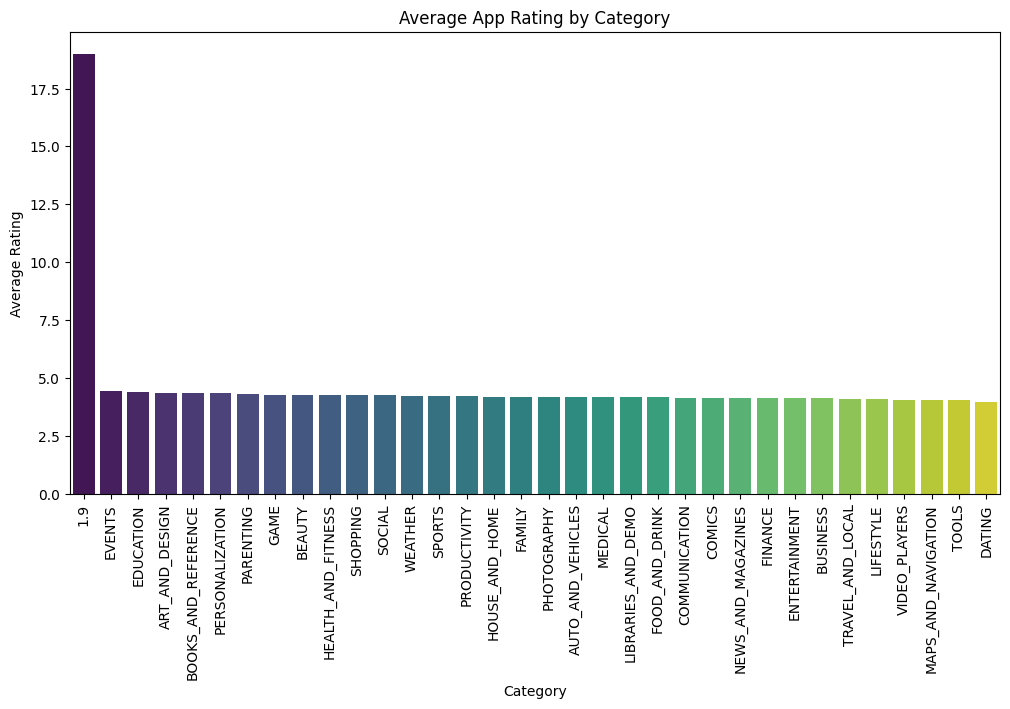

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/MasteriNeuron/datasets/main/googleplaystore.csv")

print(df.head())

# Check for missing values in 'Category' and 'Rating'
print(df[['Category','Rating']].isnull().sum())

# Drop rows with missing Rating
df_clean = df.dropna(subset=['Rating'])

# Group by category and calculate average rating
category_rating = df_clean.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(category_rating)

# Plot average rating by category
plt.figure(figsize=(12,6))
sns.barplot(x=category_rating.index, y=category_rating.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average App Rating by Category')
plt.ylabel('Average Rating')
plt.xlabel('Category')
plt.show()


8. Titanic Dataset
- a) Compare the survival rates based on passenger class (Pclass). Which class had the highest
survival rate, and why do you think that happened?
- b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and
adults (Age ≥ 18). Did children have a better chance of survival?
Dataset: https://github.com/MasteriNeuron/datasets.git
(Include your Python code and output in the code box below.)

In [50]:
import pandas as pd
import numpy as np

# Load Titanic dataset (Kaggle / standard CSV)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Part (a): Survival rate by Pclass
pclass_survival = df.groupby('Pclass')['Survived'].mean() * 100
print("Survival rate by Pclass (%):")
print(pclass_survival)

print("\nCounts by Pclass and survival status:")
print(df.groupby(['Pclass','Survived']).size().unstack(fill_value=0))

# Part (b): Survival by age group (children vs adults)
# First drop rows where Age is missing, because we can't classify them
df_age = df.dropna(subset=['Age']).copy()

df_age['AgeGroup'] = np.where(df_age['Age'] < 18, 'Child', 'Adult')

agegroup_survival = df_age.groupby('AgeGroup')['Survived'].mean() * 100
print("\nSurvival rate by AgeGroup (%):")
print(agegroup_survival)

print("\nCounts by AgeGroup and survival status:")
print(df_age.groupby(['AgeGroup','Survived']).size().unstack(fill_value=0))

# Combined check: how many children/adults in each class survived, class vs age
print("\nSurvival by Pclass and AgeGroup:")
print(df_age.groupby(['Pclass','AgeGroup'])['Survived'].mean() * 100)


Survival rate by Pclass (%):
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Counts by Pclass and survival status:
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

Survival rate by AgeGroup (%):
AgeGroup
Adult    38.103161
Child    53.982301
Name: Survived, dtype: float64

Counts by AgeGroup and survival status:
Survived    0    1
AgeGroup          
Adult     372  229
Child      52   61

Survival by Pclass and AgeGroup:
Pclass  AgeGroup
1       Adult       63.793103
        Child       91.666667
2       Adult       41.333333
        Child       91.304348
3       Adult       20.216606
        Child       37.179487
Name: Survived, dtype: float64


9. Flight Price Prediction Dataset
- a) How do flight prices vary with the days left until departure? Identify any exponential price
surges and recommend the best booking window.
- b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are
consistently cheaper/premium, and why?
Dataset: https://github.com/MasteriNeuron/datasets.git
(Include your Python code and output in the code box below.)

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (update if stored locally)
df =  pd.read_csv("https://raw.githubusercontent.com/MasteriNeuron/datasets/main/flight_price.csv")


# Drop unused column
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

print(df.head())
print(df.columns)


    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  
Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')



Average Price Based on Days Left:
days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
Name: price, dtype: float64


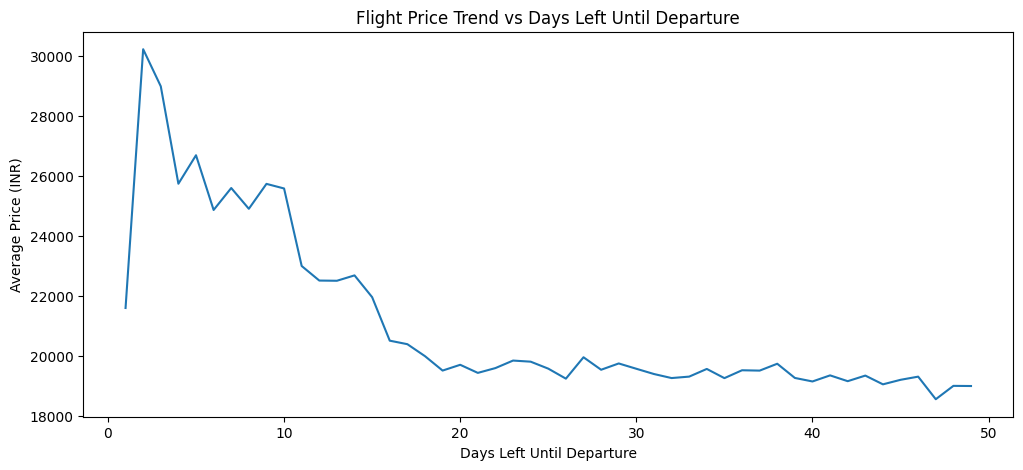

In [52]:
# Average price grouped by days left
price_by_days = df.groupby('days_left')['price'].mean()

print("\nAverage Price Based on Days Left:")
print(price_by_days.head(20))

# Visualization
plt.figure(figsize=(12,5))
sns.lineplot(x=price_by_days.index, y=price_by_days.values)
plt.title("Flight Price Trend vs Days Left Until Departure")
plt.xlabel("Days Left Until Departure")
plt.ylabel("Average Price (INR)")
plt.show()



Average price by airline for Delhi → Mumbai:
airline
AirAsia       3981.191456
Indigo        4473.739130
SpiceJet      4628.251984
GO_FIRST      5762.211515
Air_India    23695.916916
Vistara      26630.293322
Name: price, dtype: float64


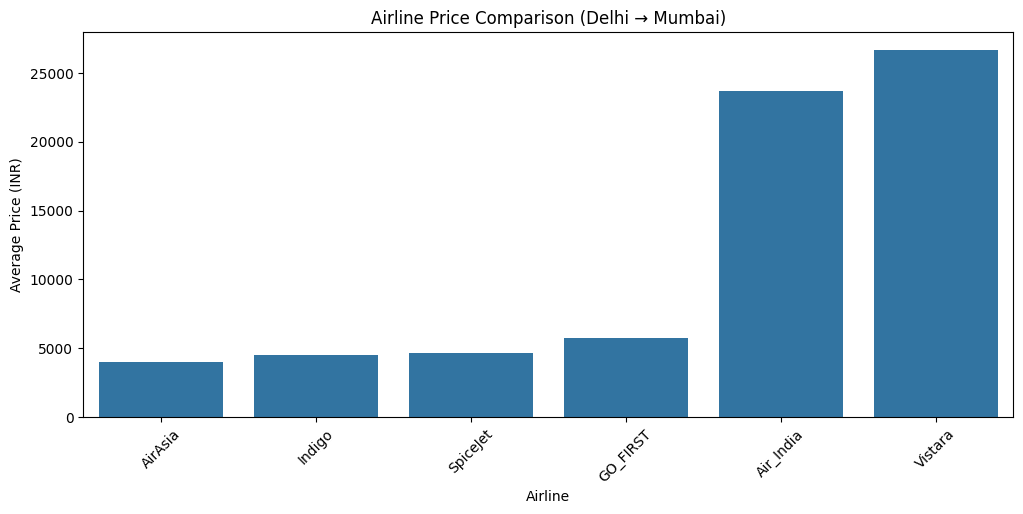

In [53]:
# Filter route Delhi → Mumbai
route_df = df[(df['source_city'] == "Delhi") & (df['destination_city'] == "Mumbai")]

# Average price by airline
price_by_airline = route_df.groupby('airline')['price'].mean().sort_values()

print("\nAverage price by airline for Delhi → Mumbai:")
print(price_by_airline)

# Visualization
plt.figure(figsize=(12,5))
sns.barplot(x=price_by_airline.index, y=price_by_airline.values)
plt.title("Airline Price Comparison (Delhi → Mumbai)")
plt.xlabel("Airline")
plt.ylabel("Average Price (INR)")
plt.xticks(rotation=45)
plt.show()


10. HR Analytics Dataset
- a). What factors most strongly correlate with employee attrition? Use visualizations to show key
drivers (e.g., satisfaction, overtime, salary).
- b). Are employees with more projects more likely to leave?
Dataset: hr_analytics


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("HRDataset_v14.csv")

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

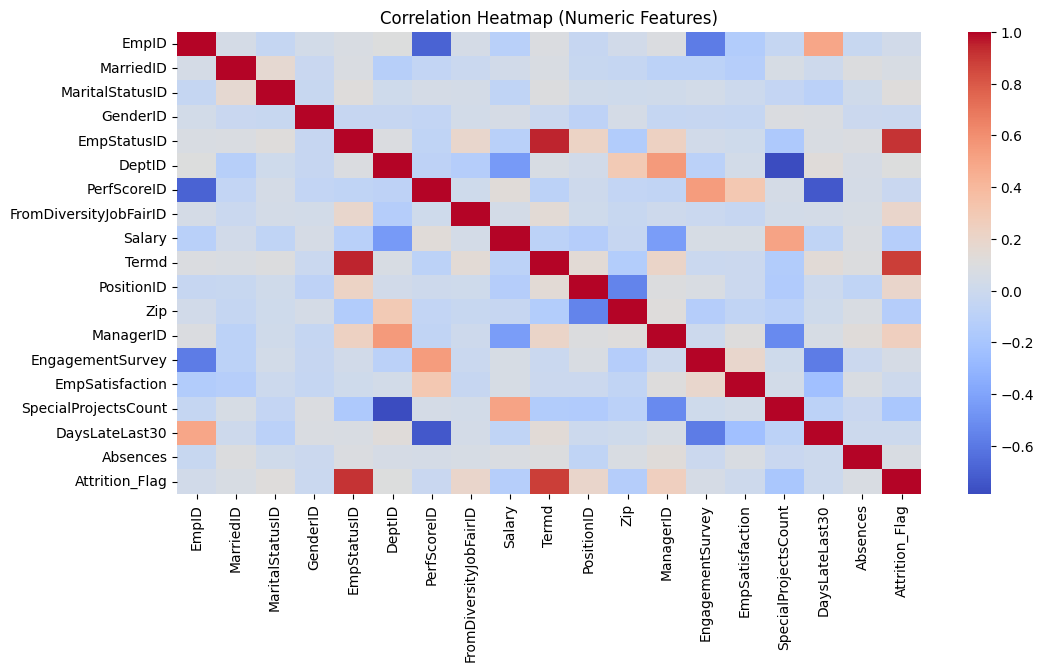

In [55]:
df['Attrition_Flag'] = df['EmploymentStatus'].apply(lambda x: 1 if x == "Voluntarily Terminated" else 0)

plt.figure(figsize=(12,6))
numeric_df = df.select_dtypes(include=["int64","float64"])
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


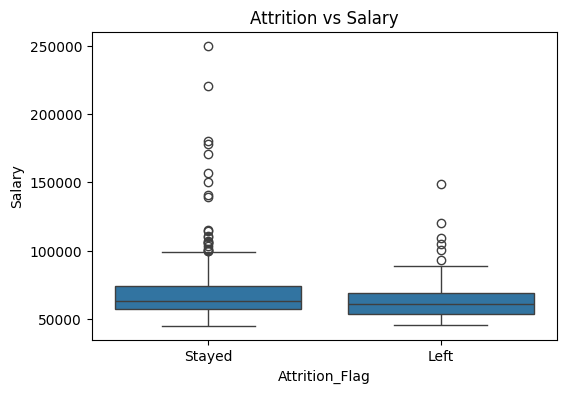

In [56]:
#Attrition vs Salary
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition_Flag', y='Salary', data=df)
plt.title("Attrition vs Salary")
plt.xticks([0,1], ['Stayed', 'Left'])
plt.show()


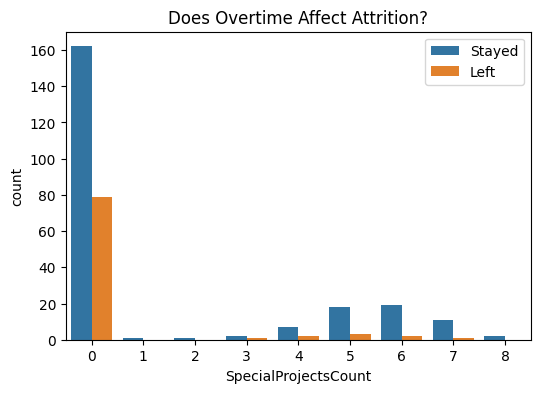

In [57]:
#Attrition vs Overtime
plt.figure(figsize=(6,4))
sns.countplot(x='SpecialProjectsCount', hue='Attrition_Flag', data=df)
plt.legend(['Stayed','Left'])
plt.title("Does Overtime Affect Attrition?")
plt.show()



In [58]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'Attrition_Flag'],
      dtype='object')

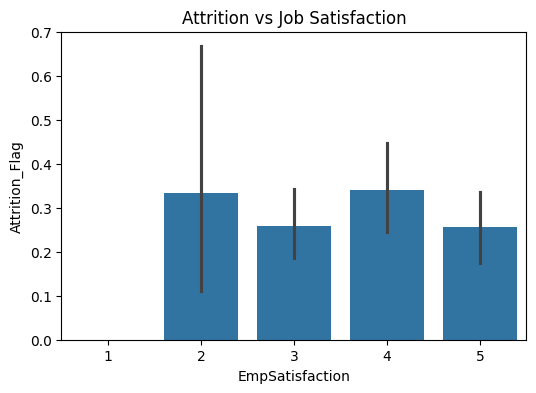

In [59]:
# Attrition vs Job Satisfaction
plt.figure(figsize=(6,4))
sns.barplot(x='EmpSatisfaction', y='Attrition_Flag', data=df)
plt.title("Attrition vs Job Satisfaction")
plt.show()


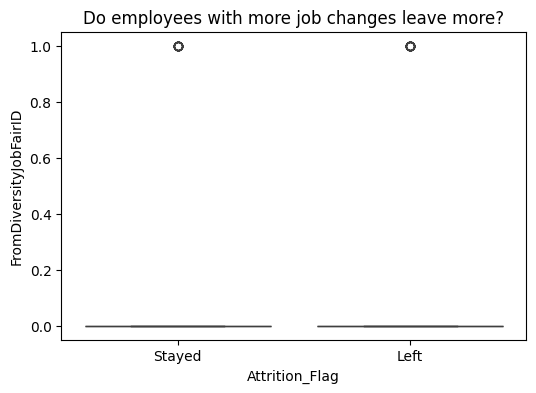

In [60]:
# B. Are employees with more projects more likely to leave?
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition_Flag', y='FromDiversityJobFairID', data=df)
plt.title("Do employees with more job changes leave more?")
plt.xticks([0,1], ["Stayed","Left"])
plt.show()
